In [1]:
!pip install nltk

### import necessary lib

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

import string
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

from time import time

import warnings
warnings. filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Load data

In [3]:
df = pd.read_csv(r"C:\Users\Hp\Desktop\ML project data sets\NLP_DATASET\alldata_1_for_kaggle.csv", encoding='latin1')

### Display the first few rows of data

In [4]:
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


### provides five summary numbers

In [5]:
df.describe()

,Unnamed: 0
count,7570.000000
mean,3784.500000
std,2185.415102
min,0.000000
25%,1892.250000
50%,3784.500000
75%,5676.750000
max,7569.000000


### Displays the missing values

In [6]:
df.isnull().sum()

Unnamed: 0    0
0             0
a             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.5+ KB


###  Drop the 'Unnamed: 0' column if it's just an index

In [8]:
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [9]:
# Rename columns for better clarity
df.columns = ['Target', 'Text']

Index(['Target', 'Text'], dtype='object')


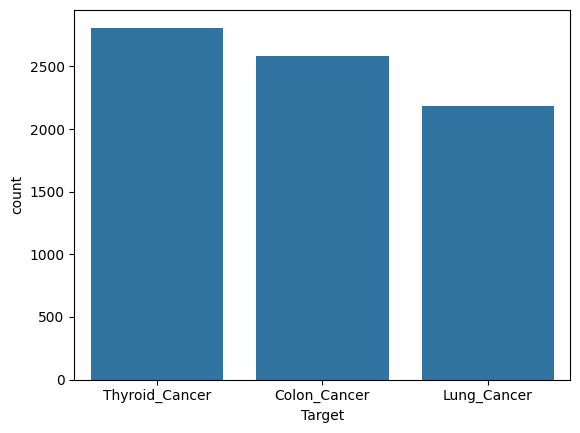

In [10]:
# Print column names
print(df.columns)

# Visualize target distribution
sns.countplot(x='Target', data=df)
plt.show()

In [11]:
df['Target'].unique()

array(['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer'], dtype=object)

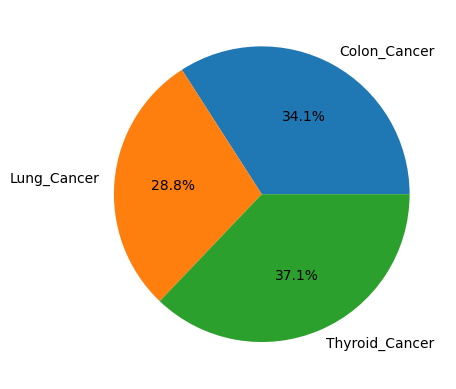

In [12]:
plt.pie(df.groupby('Target')['Target'].count(),autopct="%.1f%%",labels=['Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer'])
plt.show()

In [13]:
# Explore Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  7570 non-null   object
 1   Text    7570 non-null   object
dtypes: object(2)
memory usage: 118.4+ KB


In [14]:
df.describe()

,Target,Text
count,7570,7570
unique,3,996
top,Thyroid_Cancer,Thyroid surgery in children in a single insti...
freq,2810,10


In [15]:
df['Target'].value_counts()

Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: Target, dtype: int64

In [16]:
def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

names = ['Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer']

In [17]:
def convert_to_lowercase(text):
    return text.lower()

# Apply the function to the 'Text' column
df['final_text'] = df['Text'].apply(convert_to_lowercase)

# Display the result
df['final_text'].head()

0    thyroid surgery in  children in a single insti...
1    " the adopted strategy was the same as that us...
2    coronary arterybypass grafting thrombosis ï¬b...
3     solitary plasmacytoma sp of the skull is an u...
4     this study aimed to investigate serum matrix ...
Name: final_text, dtype: object

In [18]:
def clean_stopword(d):
    stop_words = stopwords.words('english')
    for name in names:
        stop_words.append(name)
    return " ".join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 1])

In [19]:
def tokenize(d):
    return word_tokenize(d)

In [20]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply the lemmatization function to the 'final_text' column
df['final_text_lemmatized'] = df['final_text'].apply(lemmatize_text)

# Display the result
df['final_text_lemmatized'].head()


0    thyroid surgery in child in a single instituti...
1    " the adopted strategy wa the same a that used...
2    coronary arterybypass grafting thrombosis ï¬b...
3    solitary plasmacytoma sp of the skull is an un...
4    this study aimed to investigate serum matrix m...
Name: final_text_lemmatized, dtype: object

In [21]:
# Apply cleaning, stopwords removal, and lemmatization to 'Text' column
df['final_text'] = df['Text'].apply(clean_text).apply(clean_stopword).apply(lemmatize_text).apply(word_tokenize)

# Display the result
df['final_text'].head()

0    [thyroid, surgery, child, single, institution,...
1    [adopted, strategy, used, prior, year, based, ...
2    [coronary, arterybypass, grafting, thrombosis,...
3    [solitary, plasmacytoma, sp, skull, uncommon, ...
4    [study, aimed, investigate, serum, matrix, met...
Name: final_text, dtype: object

In [22]:
df.head()

,Target,Text,final_text,final_text_lemmatized
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,"[thyroid, surgery, child, single, institution,...",thyroid surgery in child in a single instituti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...","[adopted, strategy, used, prior, year, based, ...",""" the adopted strategy wa the same a that used..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,"[coronary, arterybypass, grafting, thrombosis,...",coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,"[solitary, plasmacytoma, sp, skull, uncommon, ...",solitary plasmacytoma sp of the skull is an un...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,"[study, aimed, investigate, serum, matrix, met...",this study aimed to investigate serum matrix m...


In [23]:
for i in range(len(df)):
    df['final_text'][i] = " ".join(df['final_text'][i])

In [24]:
df['final_text'][:3]

0    thyroid surgery child single institution osama...
1    adopted strategy used prior year based four ex...
2    coronary arterybypass grafting thrombosis brin...
Name: final_text, dtype: object

In [25]:
df['Target']= df['Target'].replace(['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer'],[0,1,2])

In [26]:
df

,Target,Text,final_text,final_text_lemmatized
0,0,Thyroid surgery in children in a single insti...,thyroid surgery child single institution osama...,thyroid surgery in child in a single instituti...
1,0,""" The adopted strategy was the same as that us...",adopted strategy used prior year based four ex...,""" the adopted strategy wa the same a that used..."
2,0,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis brin...,coronary arterybypass grafting thrombosis ï¬b...
3,0,Solitary plasmacytoma SP of the skull is an u...,solitary plasmacytoma sp skull uncommon clinic...,solitary plasmacytoma sp of the skull is an un...
4,0,This study aimed to investigate serum matrix ...,study aimed investigate serum matrix metallopr...,this study aimed to investigate serum matrix m...
...,...,...,...,...
7565,1,we report the case of a 24yearold man who pres...,report case yearold man presented chief compla...,we report the case of a 24yearold man who pres...
7566,1,among synchronous colorectal cancers scrcs rep...,among synchronous colorectal cancer scrcs repo...,among synchronous colorectal cancer scrcs repo...
7567,1,the heterogeneity of cancer cells is generally...,heterogeneity cancer cell generally accepted a...,the heterogeneity of cancer cell is generally ...
7568,1,"""adipogenesis is the process through which mes...",adipogenesis process mesenchymalstem cell msc ...,"""adipogenesis is the process through which mes..."


## Feature Extraction

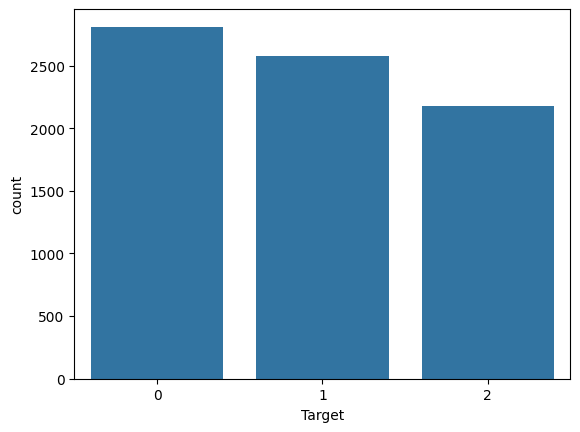

In [27]:
# Feature Extraction using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000, max_df=0.85)
X_tfidf = tfidf_vectorizer.fit_transform(df['Text']).toarray()

# Visualize target distribution
sns.countplot(x='Target', data=df)
plt.show()

In [28]:
!pip install wordcloud

## Bag of Words

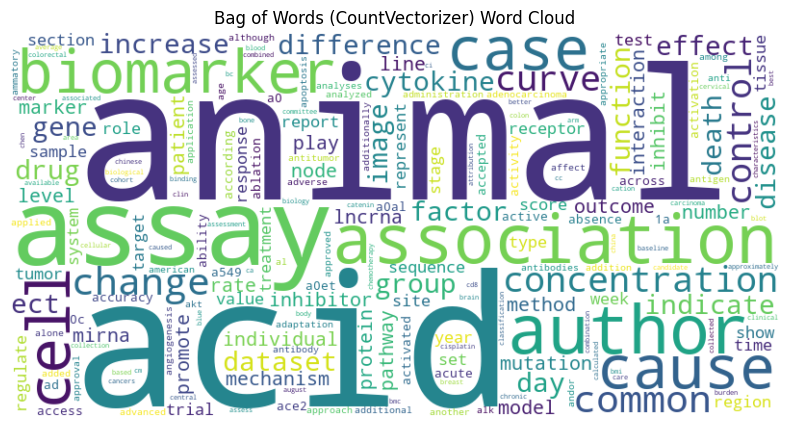

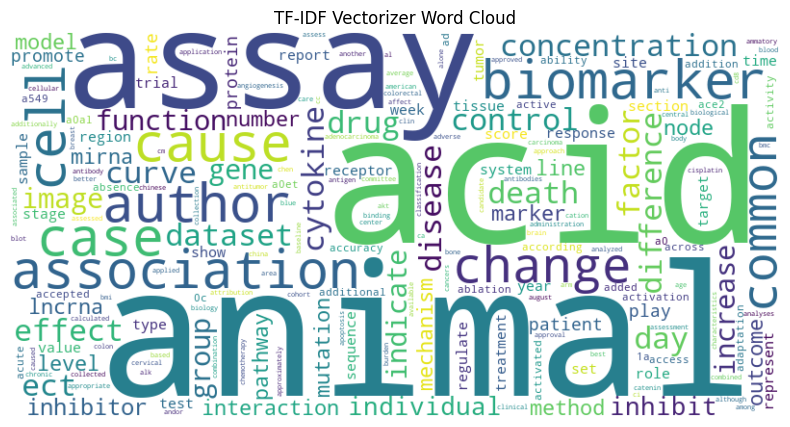

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Bag of Words (CountVectorizer)
vectorizer = CountVectorizer(max_features=1000, max_df=0.85)
X = vectorizer.fit_transform(df['Text']).toarray()

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, max_df=0.85)
X_tfidf = tfidf_vectorizer.fit_transform(df['Text']).toarray()

# Helper function to create a word cloud
def create_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Convert Bag of Words array to text
bow_text = ' '.join(vectorizer.get_feature_names_out())

# Convert TF-IDF array to text
tfidf_text = ' '.join(tfidf_vectorizer.get_feature_names_out())

# Create word clouds
create_wordcloud(bow_text, 'Bag of Words (CountVectorizer) Word Cloud')
create_wordcloud(tfidf_text, 'TF-IDF Vectorizer Word Cloud')


In [30]:
!pip install gensim

## Word2Vec model

In [31]:
# Import necessary libraries
import pandas as pd  # For handling data in DataFrame format
from nltk.tokenize import word_tokenize  # For tokenizing (breaking text into words)
from gensim.models import Word2Vec  # For training Word2Vec model
from sklearn.manifold import TSNE  # For dimensionality reduction
import matplotlib.pyplot as plt  # For plotting

In [32]:
# Tokenizes the text in the 'Text' column, breaking it into individual words.
tokenized_text = [word_tokenize(text) for text in df['Text']]

In [33]:
# Train Word2Vec model using tokenized text
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

In [34]:
# Extract word vectors for all words in the vocabulary
word_vectors = [word2vec_model.wv[word] for word in word2vec_model.wv.index_to_key]

In [35]:
# Convert word_vectors to a DataFrame for easy manipulation
word_vectors_df = pd.DataFrame(word_vectors, columns=[f'Dimension_{i}' for i in range(len(word_vectors[0]))])

In [36]:
# Apply t-SNE for dimensionality reduction (from high-dimensional space to 2D)
tsne_model = TSNE(n_components=2, random_state=42, n_iter=300)
tsne_data = tsne_model.fit_transform(word_vectors_df)

In [37]:
# Create a DataFrame for visualization
tsne_df = pd.DataFrame(tsne_data, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Word'] = word2vec_model.wv.index_to_key

## Create Logistic  Model

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [39]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [40]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['final_text'])
X_test = vectorizer.transform(test_data['final_text'])

In [41]:
# Create Logistic Regression Model
logreg_model = LogisticRegression()

In [42]:
# Train the model
logreg_model.fit(X_train, train_data['Target'])

LogisticRegression()

In [43]:
# Make predictions on the test set
predictions = logreg_model.predict(X_test)

In [44]:
# Evaluate the model
accuracy = accuracy_score(test_data['Target'], predictions)
classification_report_result = classification_report(test_data['Target'], predictions)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_result)

Accuracy: 0.9386

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       590
           1       0.90      0.92      0.91       517
           2       1.00      1.00      1.00       407

    accuracy                           0.94      1514
   macro avg       0.94      0.94      0.94      1514
weighted avg       0.94      0.94      0.94      1514



In [45]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [46]:
# Create Logistic Regression Model
logreg_model = LogisticRegression()

In [47]:
# Create GridSearchCV object
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')

In [48]:
# Train the model with grid search
grid_search.fit(X_train, train_data['Target'])

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [49]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [50]:
# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

In [51]:
# Evaluate the model
accuracy = accuracy_score(test_data['Target'], predictions)
classification_report_result = classification_report(test_data['Target'], predictions)

# Display the results
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy after tuning: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_result)

Best Hyperparameters: {'C': 100}
Accuracy after tuning: 0.9888

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       590
           1       0.98      0.98      0.98       517
           2       1.00      1.00      1.00       407

    accuracy                           0.99      1514
   macro avg       0.99      0.99      0.99      1514
weighted avg       0.99      0.99      0.99      1514



## creating a Support Vector Machine (SVM) model

In [52]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [53]:
# Create LinearSVC Model
svm_model = LinearSVC()

In [54]:
# Train the model
svm_model.fit(X_train, train_data['Target'])

LinearSVC()

In [55]:
# Make predictions on the test set
predictions = svm_model.predict(X_test)

In [56]:
# Evaluate the model
accuracy = accuracy_score(test_data['Target'], predictions)
classification_report_result = classification_report(test_data['Target'], predictions)

In [57]:
# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_result)

Accuracy: 0.9604

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95       590
           1       0.92      0.97      0.94       517
           2       1.00      1.00      1.00       407

    accuracy                           0.96      1514
   macro avg       0.96      0.96      0.96      1514
weighted avg       0.96      0.96      0.96      1514



### Hyperparameter tuning using GridSearchCV

In [58]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
svm_model = LinearSVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, train_data['Target'])

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [59]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [60]:
# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

In [61]:
# Evaluate the model after tuning
accuracy = accuracy_score(test_data['Target'], predictions)
classification_report_result = classification_report(test_data['Target'], predictions)

# Display the results after tuning
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy after tuning: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_result)

Best Hyperparameters: {'C': 100}
Accuracy after tuning: 0.9987

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       590
           1       1.00      1.00      1.00       517
           2       1.00      1.00      1.00       407

    accuracy                           1.00      1514
   macro avg       1.00      1.00      1.00      1514
weighted avg       1.00      1.00      1.00      1514



## Random Forest classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [64]:
# Create Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

In [65]:
# Train the model
rf_model.fit(X_train, train_data['Target'])

RandomForestClassifier(random_state=42)

In [66]:
# Make predictions on the test set
predictions = rf_model.predict(X_test)

In [67]:
# Evaluate the model
accuracy = accuracy_score(test_data['Target'], predictions)
classification_report_result = classification_report(test_data['Target'], predictions)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_result)

Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       590
           1       1.00      1.00      1.00       517
           2       1.00      1.00      1.00       407

    accuracy                           1.00      1514
   macro avg       1.00      1.00      1.00      1514
weighted avg       1.00      1.00      1.00      1514



### Hyperparameter tuning using GridSearchCV

In [68]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

In [69]:
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, train_data['Target'])

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [70]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [71]:
# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

In [72]:
# Evaluate the model after tuning
accuracy = accuracy_score(test_data['Target'], predictions)
classification_report_result = classification_report(test_data['Target'], predictions)

# Display the results after tuning
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy after tuning: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_result)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy after tuning: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       590
           1       1.00      1.00      1.00       517
           2       1.00      1.00      1.00       407

    accuracy                           1.00      1514
   macro avg       1.00      1.00      1.00      1514
weighted avg       1.00      1.00      1.00      1514



## creating a Naive Bayes model

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['final_text'])
X_test = vectorizer.transform(test_data['final_text'])
nb_pipeline = Pipeline([
    ('nb', MultinomialNB())
])

nb_pipeline.fit(X_train, train_data['Target'])

nb_predictions = nb_pipeline.predict(X_test)
nb_accuracy = accuracy_score(test_data['Target'], nb_predictions)
nb_classification_report = classification_report(test_data['Target'], nb_predictions)
print("Naive Bayes Model:")
print(f"Accuracy: {nb_accuracy:.4f}")
print("\nClassification Report:\n", nb_classification_report)

Naive Bayes Model:
Accuracy: 0.9221

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       590
           1       0.90      0.87      0.89       517
           2       1.00      0.99      1.00       407

    accuracy                           0.92      1514
   macro avg       0.93      0.93      0.93      1514
weighted avg       0.92      0.92      0.92      1514

